In [18]:
import pandas as pd

# Sample dataset
data = {
    "customer_id": [101, 102, 103, 104, 105],
    "age": [28, 34, 22, 45, None],
    "income": [30000, 45000, 25000, 52000, 38000],
    "region": ["London", "Manchester", "London", "Leeds", "London"],
    "risk_score": [2.1, 3.5, 1.8, 2.9, 2.4],  # Simulated risk rating
    "quote_amount": [300.0, 450.0, None, 510.0, 390.0],
    "accepted": [1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

# Preview data
df.head()


,customer_id,age,income,region,risk_score,quote_amount,accepted
0,101,28.0,30000,London,2.1,300.0,1
1,102,34.0,45000,Manchester,3.5,450.0,0
2,103,22.0,25000,London,1.8,NaN,1
3,104,45.0,52000,Leeds,2.9,510.0,1
4,105,NaN,38000,London,2.4,390.0,0


In [19]:
# Get number of rows/columns
print("Shape:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Get data types and non-null counts
print("\nInfo:\n")
df.info()

# Descriptive stats (mean, std, etc.)
print("\nDescribe:\n")
df.describe()


Shape: (5, 7)

Missing values:
 customer_id     0
age             1
income          0
region          0
risk_score      0
quote_amount    1
accepted        0
dtype: int64

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   5 non-null      int64  
 1   age           4 non-null      float64
 2   income        5 non-null      int64  
 3   region        5 non-null      object 
 4   risk_score    5 non-null      float64
 5   quote_amount  4 non-null      float64
 6   accepted      5 non-null      int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 408.0+ bytes

Describe:



,customer_id,age,income,risk_score,quote_amount,accepted
count,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000
mean,103.000000,32.250000,38000.000000,2.540000,412.500000,0.600000
std,1.581139,9.810708,10931.605555,0.673053,89.582364,0.547723
min,101.000000,22.000000,25000.000000,1.800000,300.000000,0.000000
25%,102.000000,26.500000,30000.000000,2.100000,367.500000,0.000000
50%,103.000000,31.000000,38000.000000,2.400000,420.000000,1.000000
75%,104.000000,36.750000,45000.000000,2.900000,465.000000,1.000000
max,105.000000,45.000000,52000.000000,3.500000,510.000000,1.000000


In [20]:
# Fill missing age with average age
df["age"].fillna(df["age"].mean(), inplace=True)

# Drop rows where quote_amount is missing
df.dropna(subset=["quote_amount"], inplace=True)

# Confirm fixes
df.isnull().sum()


/var/folders/23/vwtfbyf91z545xxmvnlv_9q40000gp/T/ipykernel_8790/3317212811.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(), inplace=True)


customer_id     0
age             0
income          0
region          0
risk_score      0
quote_amount    0
accepted        0
dtype: int64

In [21]:
# Average quote amount by region
df.groupby("region")["quote_amount"].mean()


region
Leeds         510.0
London        345.0
Manchester    450.0
Name: quote_amount, dtype: float64

In [22]:
# How many customers accepted quotes per region
df.groupby("region")["accepted"].mean()


region
Leeds         1.0
London        0.5
Manchester    0.0
Name: accepted, dtype: float64

In [23]:
df[df["age"] < 30]["accepted"].mean()


np.float64(1.0)

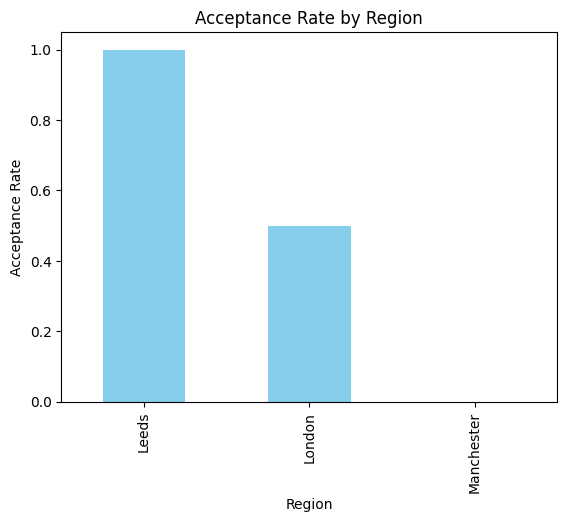

In [24]:
import matplotlib.pyplot as plt

df.groupby("region")["accepted"].mean().plot(kind="bar", color="skyblue")
plt.title("Acceptance Rate by Region")
plt.xlabel("Region")
plt.ylabel("Acceptance Rate")
plt.show()


In [25]:
# Create derived metrics
df["price_per_age"] = df["quote_amount"] / df["age"]
df["price_per_income"] = df["quote_amount"] / df["income"]

# Preview the new metrics
df[["customer_id", "quote_amount", "age", "income", "price_per_age", "price_per_income"]]


,customer_id,quote_amount,age,income,price_per_age,price_per_income
0,101,300.0,28.00,30000,10.714286,0.010000
1,102,450.0,34.00,45000,13.235294,0.010000
3,104,510.0,45.00,52000,11.333333,0.009808
4,105,390.0,32.25,38000,12.093023,0.010263


In [26]:
# Simulated business targets for acceptance rate per region
targets = pd.DataFrame({
    "region": ["London", "Manchester", "Leeds"],
    "target_acceptance_rate": [0.6, 0.4, 0.8]
})

# Merge on region
merged = pd.merge(df, targets, on="region", how="left")

# View merged result
merged[["region", "accepted", "target_acceptance_rate"]]


,region,accepted,target_acceptance_rate
0,London,1,0.6
1,Manchester,0,0.4
2,Leeds,1,0.8
3,London,0,0.6


In [27]:
# Compare actual vs target acceptance
actual_vs_target = merged.groupby("region").agg({
    "accepted": "mean",
    "target_acceptance_rate": "first"
}).reset_index()

# Add success flag
actual_vs_target["meets_target"] = actual_vs_target["accepted"] >= actual_vs_target["target_acceptance_rate"]

actual_vs_target


,region,accepted,target_acceptance_rate,meets_target
0,Leeds,1.0,0.8,True
1,London,0.5,0.6,False
2,Manchester,0.0,0.4,False


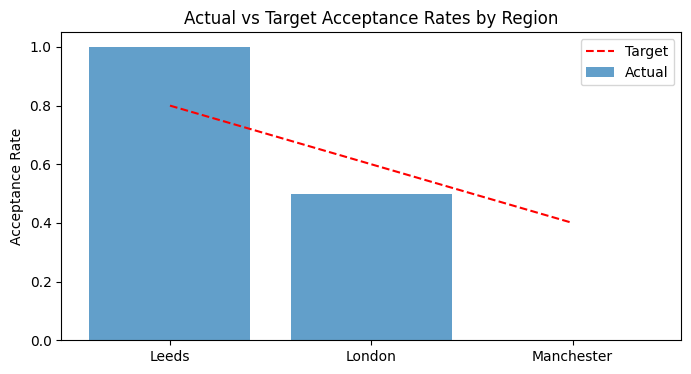

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(actual_vs_target["region"], actual_vs_target["accepted"], label="Actual", alpha=0.7)
plt.plot(actual_vs_target["region"], actual_vs_target["target_acceptance_rate"], label="Target", color="red", linestyle="--")
plt.legend()
plt.title("Actual vs Target Acceptance Rates by Region")
plt.ylabel("Acceptance Rate")
plt.show()
